In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [126]:
li = np.array([i%72 if (i%72)>7 else (i%72+10) for i in range(300)])
family_his = np.round(np.random.rand(300))
smoker_or_not = np.array([np.random.choice([0, 1]) if li[i] > 16 else 0 for i in range(300)])
cancer_yes_no = np.round(np.random.rand(300))

In [127]:
df = pd.DataFrame({
    'Age': li,
    'Family_History': family_his,
    'Smoker_or_Not': smoker_or_not,
    'Cancer_Yes_No': cancer_yes_no
},dtype='float32')

In [128]:
features=["Age","Family_History","Smoker_or_Not"]
X=df[features]
y=df.Cancer_Yes_No

In [129]:
weights = np.zeros(X.shape[1]) 
bias = 0

learning_rate = 0.01
num_iterations = 1000

In [130]:
cost_history = []
for i in range(num_iterations):
    z = np.dot(X, weights) + bias
    y_hat = 1 / (1 + np.exp(-z))
    
    m = len(y)
    cost = -1/m * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    
    dw = 1/m * np.dot(X.T, (y_hat - y))
    db = 1/m * np.sum(y_hat - y)
    
    weights -= learning_rate * dw
    bias -= learning_rate * db
    
    if i % 100 == 0:
        cost_history.append(cost)


In [131]:
z = np.dot(X, weights) + bias
y_hat = 1 / (1 + np.exp(-z))
predictions = [1 if i > 0.5 else 0 for i in y_hat]

print("Trained weights:", weights)
print("Bias:", bias)
print("Predictions:", predictions[:10])  
print("Predictions:", y_hat[:10]) 

Trained weights: [ 0.05996345  0.07727422 -0.01975263]
Bias: 0.09049125545118852
Predictions: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Predictions: [0.6659949  0.67919814 0.69212072 0.70474905 0.71707114 0.74406735
 0.75531823 0.76267319 0.6564408  0.65252626]


In [132]:
b1,b2,b3=weights
b0 = bias

In [133]:
-b0/b1

np.float64(-1.5091068946018604)

In [134]:
-b0/b2

np.float64(-1.1710407248118746)

In [135]:
-b0/b3

np.float64(4.5812261440814055)

In [136]:
n=np.array([16,1,0])

In [137]:
z = np.dot(n, weights) + bias
y_hat = 1 / (1 + np.exp(-z))
predictions = 1 if y_hat > 0.5 else 0

print("Trained weights:", weights)
print("Bias:", bias)
print("Predictions:", predictions)  
print("Predictions:", y_hat) 

Trained weights: [ 0.05996345  0.07727422 -0.01975263]
Bias: 0.09049125545118852
Predictions: 1
Predictions: 0.7553182263067963


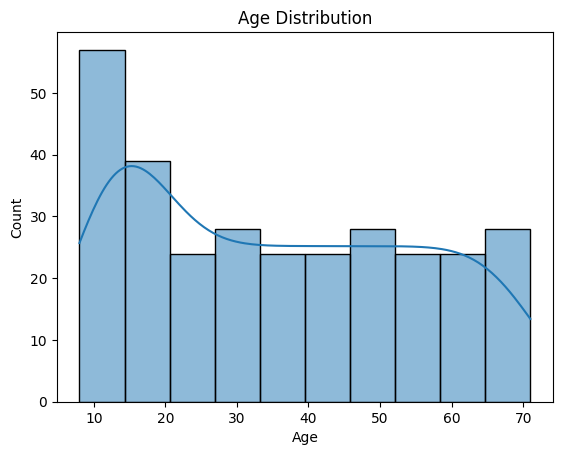

In [139]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

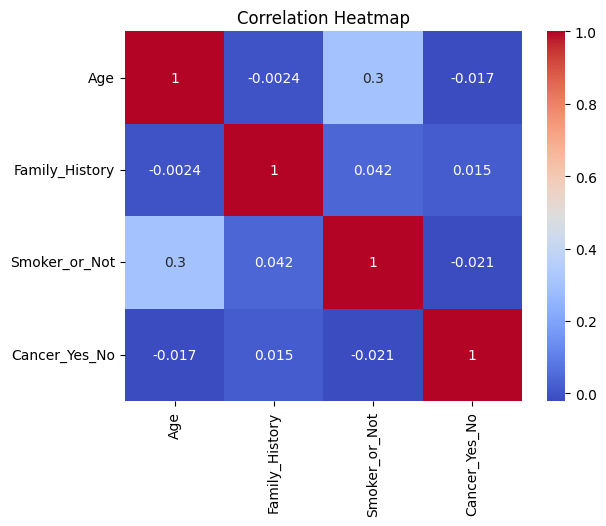

In [140]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


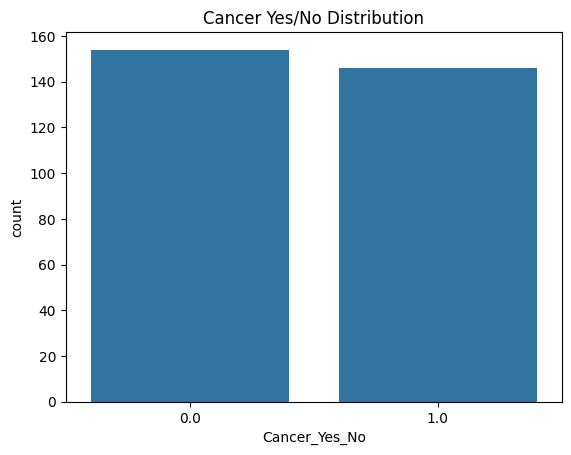

In [141]:
sns.countplot(x='Cancer_Yes_No', data=df)
plt.title("Cancer Yes/No Distribution")
plt.show()


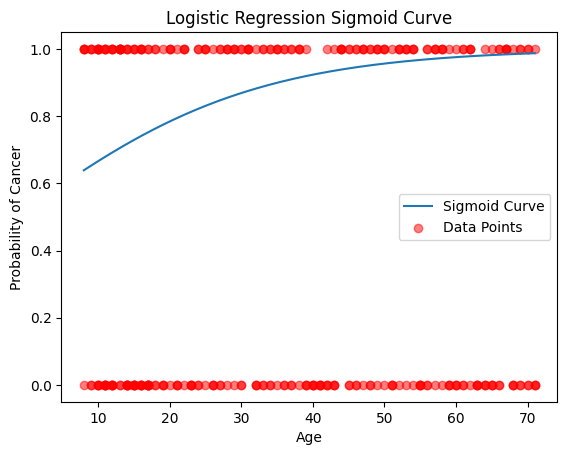

In [144]:
x = np.linspace(df['Age'].min(), df['Age'].max(), 300)
y_hat = 1 / (1 + np.exp(-(bias + weights[0] * x)))  

plt.plot(x, y_hat, label="Sigmoid Curve")
plt.scatter(df['Age'], df['Cancer_Yes_No'], color='red', alpha=0.5, label="Data Points")
plt.xlabel("Age")
plt.ylabel("Probability of Cancer")
plt.title("Logistic Regression Sigmoid Curve")
plt.legend()
plt.show()


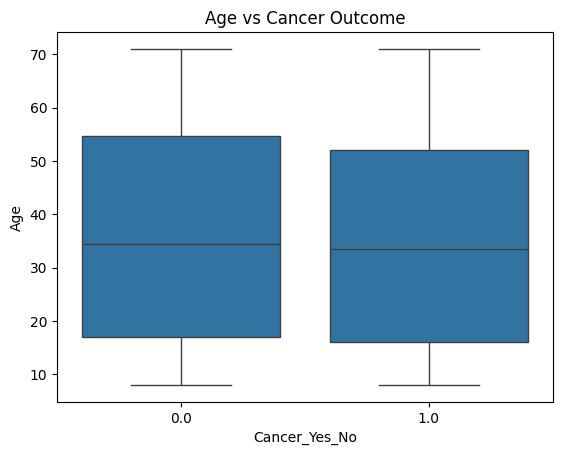

In [145]:
sns.boxplot(x='Cancer_Yes_No', y='Age', data=df)
plt.title("Age vs Cancer Outcome")
plt.show()


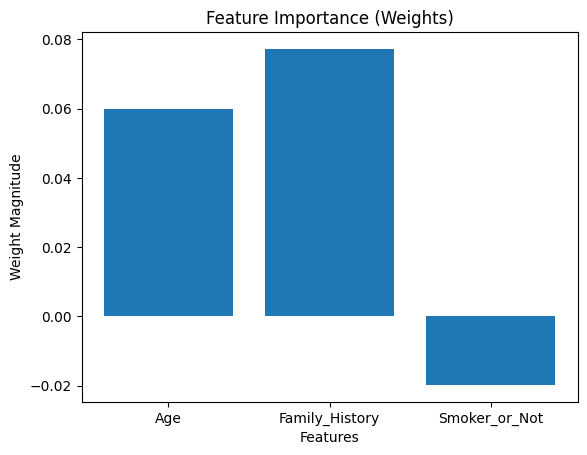

In [146]:
features = ["Age", "Family_History", "Smoker_or_Not"]

plt.bar(features, weights)
plt.title("Feature Importance (Weights)")
plt.xlabel("Features")
plt.ylabel("Weight Magnitude")
plt.show()


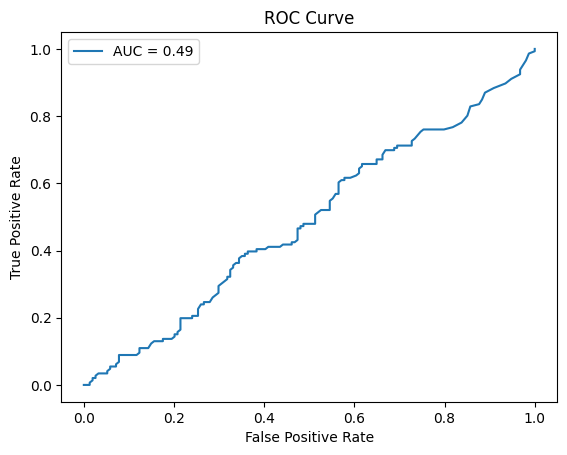

In [147]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = 1 / (1 + np.exp(-(np.dot(X, weights) + bias)))  
fpr, tpr, thresholds = roc_curve(y, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y, y_probs):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


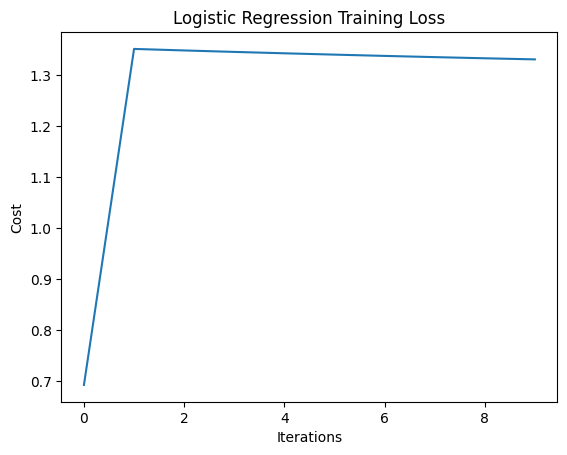

In [149]:
plt.plot(range(len(cost_history)), cost_history)
plt.title("Logistic Regression Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()
